In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from scipy import stats

In [2]:
data = pd.read_csv("SEIR-privacy-v0-9 proxy-sigma-effect-on-R0-table.csv", skiprows=6)

In [38]:
data_c = pd.read_csv("SEIR-privacy-v0-9 proxy-sigma-effect-on-R0-extra-table.csv", skiprows=6)

In [39]:
data = data.drop_duplicates(subset = '[run number]', keep='last')

In [40]:
data['proxy-sigma'].drop_duplicates()

0      0.0
598    0.2
Name: proxy-sigma, dtype: float64

In [41]:
data.columns

Index(['[run number]', 'N', 'symptom-prob', 'adoption-slope',
       'transmission-prob', 'adoption-rate', 'can-relax', 'proxy-sigma',
       'start-infected', 'max-contacts', 'recovery-prob',
       'exposed-to-infectious-prob', 'roam-range', '[step]',
       'final-susceptible', 'final-recovered', 'max-exposed', 'max-infectious',
       'max-symptomatic'],
      dtype='object')

In [42]:
data = data.rename(
    columns = {
        'count turtles with [adopter?]' : 'adopter-count',
        'count turtles with [epi-state = susceptible-code]' : 'final-susceptible',
        'count turtles with [epi-state = susceptible-code and adopter?] / count turtles with [adopter?]' : 'final-%-adopters-susceptible',
        'count turtles with [epi-state = susceptible-code and not adopter?] / count turtles with [not adopter?]' : 'final-%-non-adopters-susceptible',
        'count turtles with [epi-state = recovered-code] - start-infected' : 'final-recovered',
        'count turtles with [alerted?]' : 'final-alerted',
        'count turtles with [epi-state = susceptible-code and adopter?]' : 'final-adopter-susceptible',
        'count turtles with [epi-state = recovered-code and adopter?] - start-infected' : 'final-adopter-recovered',
        'count turtles with [alerted? and adopter?]' : 'final-adopter-alerted',
        'count turtles with [adopter?] / count turtles with [epi-state = susceptible-code]' : 'adopter per susceptible',
        'count turtles with [alerted?] / count turtles with [epi-state = susceptible-code]' : 'alerted per susceptible',
        'total-tests  / count turtles with [epi-state = susceptible-code]' : 'test per susceptible'
        
    }
)

In [55]:
data_c = data_c.rename(
    columns = {
        'count turtles with [adopter?]' : 'adopter-count',
        'count turtles with [epi-state = susceptible-code]' : 'final-susceptible',
        'count turtles with [epi-state = susceptible-code and adopter?] / count turtles with [adopter?]' : 'final-%-adopters-susceptible',
        'count turtles with [epi-state = susceptible-code and not adopter?] / count turtles with [not adopter?]' : 'final-%-non-adopters-susceptible',
        'count turtles with [epi-state = recovered-code] - start-infected' : 'final-recovered',
        'count turtles with [alerted?]' : 'final-alerted',
        'count turtles with [epi-state = susceptible-code and adopter?]' : 'final-adopter-susceptible',
        'count turtles with [epi-state = recovered-code and adopter?] - start-infected' : 'final-adopter-recovered',
        'count turtles with [alerted? and adopter?]' : 'final-adopter-alerted',
        'count turtles with [adopter?] / count turtles with [epi-state = susceptible-code]' : 'adopter per susceptible',
        'count turtles with [alerted?] / count turtles with [epi-state = susceptible-code]' : 'alerted per susceptible',
        'total-tests  / count turtles with [epi-state = susceptible-code]' : 'test per susceptible'
        
    }
)

The plots show the effect of ranging variables on the percentage of final susceptibles for adopters and non-adopters, respectively.

In [43]:
data.groupby('proxy-sigma')['final-susceptible'].max()

proxy-sigma
0.0    4999
0.2    4999
Name: final-susceptible, dtype: int64

In [44]:
data.groupby('proxy-sigma')['final-susceptible'].min()

proxy-sigma
0.0    1243
0.2    1343
Name: final-susceptible, dtype: int64

In [45]:
data.groupby('proxy-sigma')['final-susceptible'].mean()

proxy-sigma
0.0    3384.260000
0.2    4177.801667
Name: final-susceptible, dtype: float64

In [46]:
data[data['proxy-sigma'] == 0.0].shape

(600, 19)

In [47]:
data[(data['proxy-sigma'] == 00) & (data['final-susceptible'] < 9900)].shape

(600, 19)

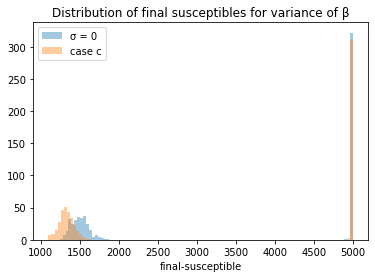

In [63]:
sn.distplot(data[(data['proxy-sigma'] == 0.0)]['final-susceptible'],
            label="σ = 0",
            hist = True,
            bins = 100,
            kde = False,
            kde_kws = {'bw' : 25}
           )
'''
sn.distplot(data[(data['proxy-sigma'] == 0.2) & 
                 (data['final-susceptible'] < 9900)]['final-susceptible'],
            label="σ = 0.2",
            hist = True,
            bins = 50,
            kde = True,
            kde_kws = {'bw' : 25}
            
           )
'''
sn.distplot(data_c['final-susceptible'],
            label="case c",
            hist = True,
            bins = 100,
            kde = False,
            kde_kws = {'bw' : 25}
            
           )
#sn.distplot(data[data['proxy-sigma'] == 0.4]['final-susceptible'],
#            label="σ = 0.4",
#            hist = True,
#            kde = False,
#            bins = 50
#           )
plt.title("Distribution of final susceptibles for variance of β")
plt.legend()

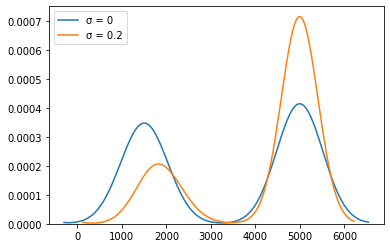

In [49]:
sn.kdeplot(data[data['proxy-sigma'] == 0.0]['final-susceptible'], label="σ = 0")
sn.kdeplot(data[data['proxy-sigma'] == 0.2]['final-susceptible'], label="σ = 0.2")
sn.kdeplot(data[data['proxy-sigma'] == 0.4]['final-susceptible'], label="σ = 0.4")

In [50]:
cat0 = data[data['proxy-sigma'] == 0]['final-susceptible']
cat1 = data[data['proxy-sigma'] == 0.2]['final-susceptible']

In [51]:
(cat0.mean(), cat0.std(), cat0.shape)

(3384.26, 1744.506052730503, (600,))

In [52]:
(cat1.mean(), cat1.std(), cat1.shape)

(4177.801666666666, 1381.9648501592549, (600,))

In [58]:
cat2 = data_c['final-susceptible']
(cat2.mean(), cat2.std(), cat2.shape)

(3242.3866666666668, 1835.4723665866097, (600,))

In [59]:
stats.ttest_ind(cat0,cat2)

Ttest_indResult(statistic=1.3723687812033638, pvalue=0.17020554573184474)